<a href="https://colab.research.google.com/github/dgscharan/Computer_vision/blob/main/mazdoc_box_sorting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 
from google.colab.patches import cv2_imshow



In [ ]:
! apt install tesseract-ocr
! apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 25 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 0s (25.7 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 144542 files and directories currently installed.)
Preparing to unpack .../tesseract

In [ ]:
! pip install Pillow
! pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.3-py2.py3-none-any.whl size=13396 sha256=55fada7e5c6c1ef3a381bb7263444f7da62e40f45310e0d5c6bc9e47129354e2
  Stored in directory: /root/.cache/pip/wheels/82/1a/d0/a884540a5602305f5bb7ff44f05550be20453edce8fae69241
Successfully built pytesseract


In [ ]:


try:
    from PIL import Image
except ImportError:
    import Image 

import pytesseract

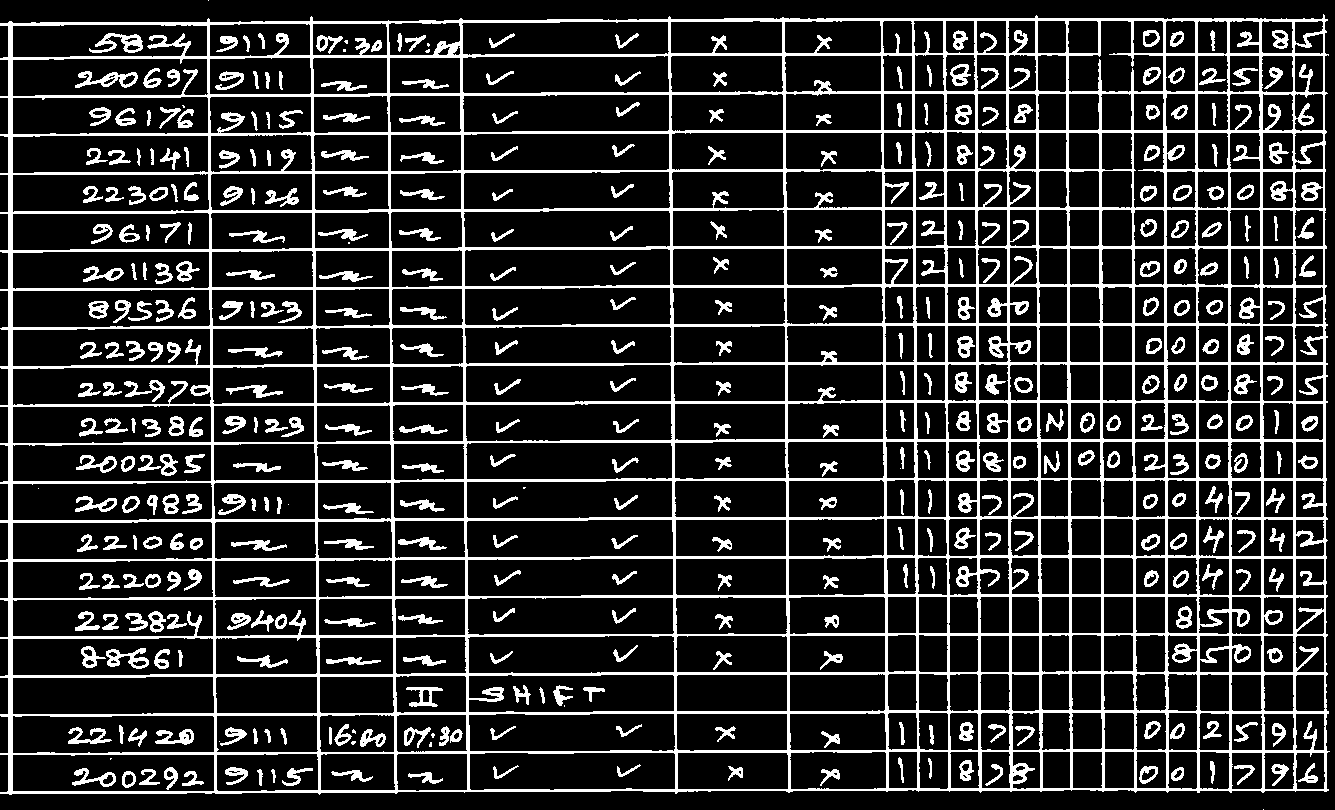

In [ ]:
img = cv2.imread('mazdoc.jpg', 0)
(thresh, img_bin) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img_bin = 255-img_bin
cv2_imshow(img_bin)

In [ ]:
kernel_length = np.array(img).shape[1]//80

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))

horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))




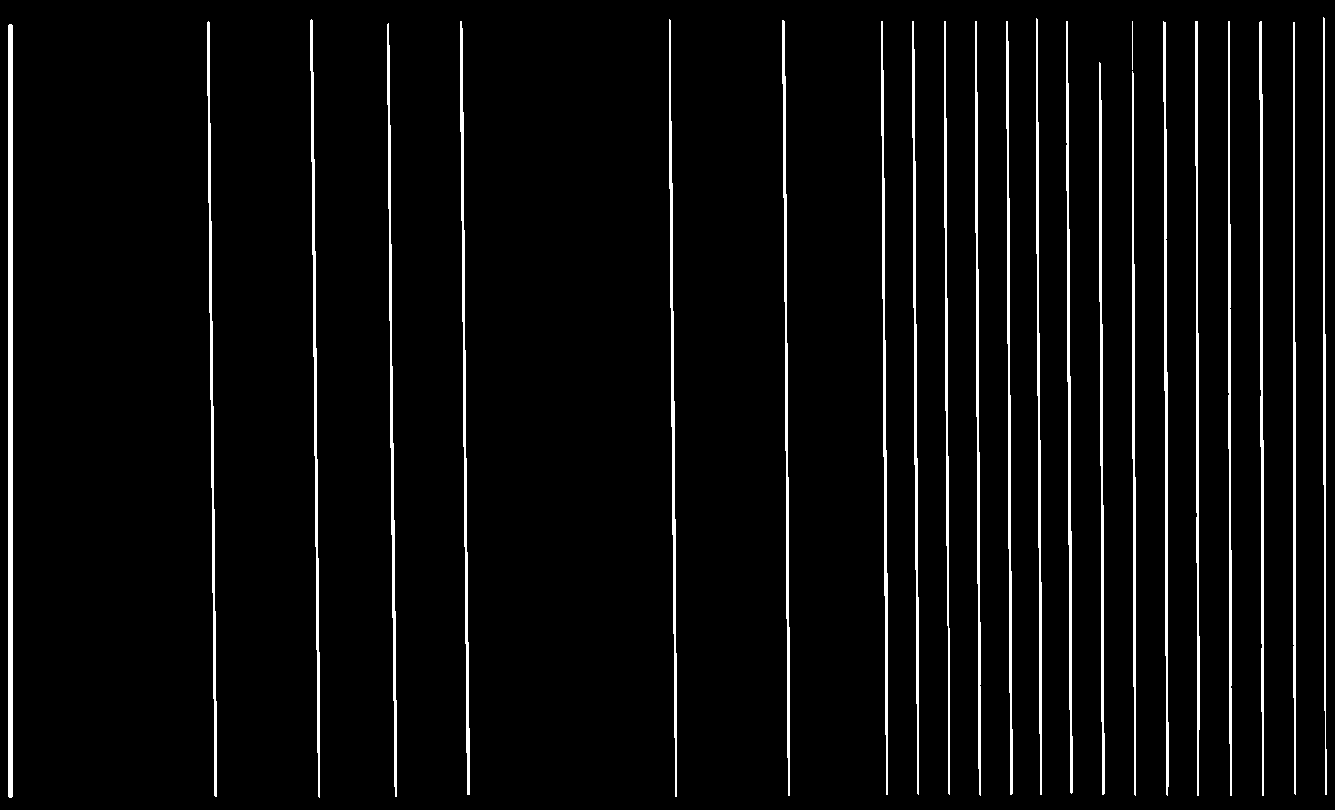

In [ ]:
temp_img_1 = cv2.erode(img_bin, vertical_kernel, iterations = 3)
vertical_lines = cv2.dilate(temp_img_1, vertical_kernel, iterations = 3)
cv2_imshow(vertical_lines)

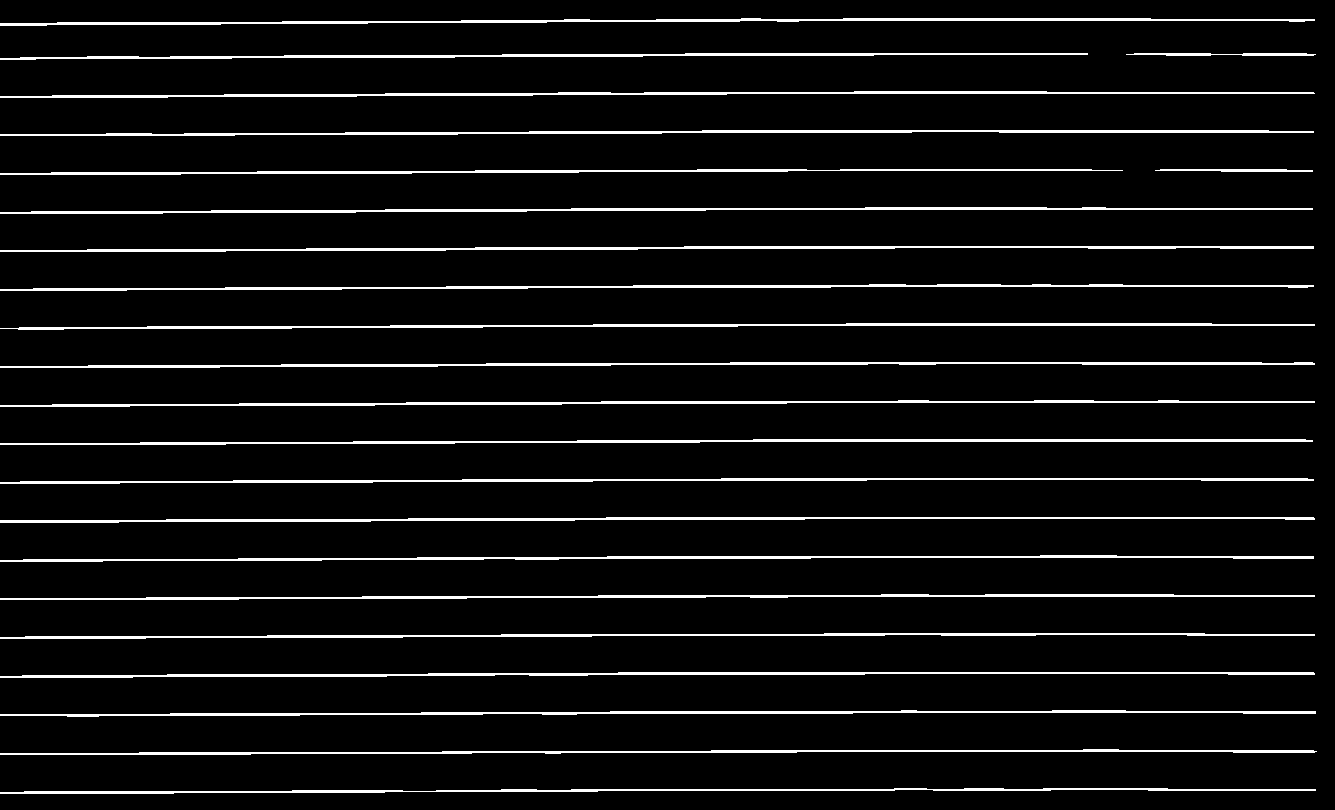

In [ ]:
temp_img_2 = cv2.erode(img_bin, horizontal_kernel, iterations = 3)
horizontal_lines = cv2.dilate(temp_img_2, horizontal_kernel, iterations = 1)
cv2_imshow(horizontal_lines)

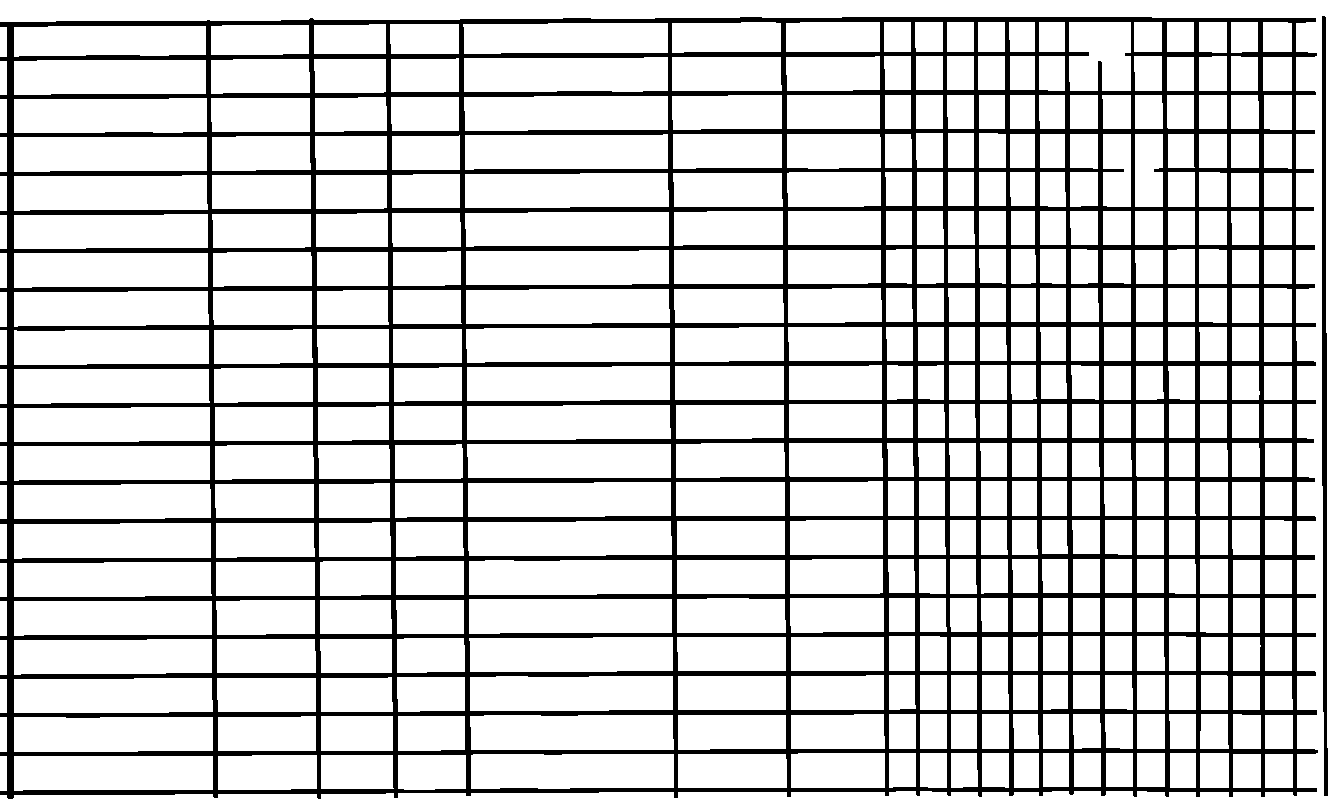

In [ ]:
alpha = 0.5
beta = 1.0 - alpha

combined_image = cv2.addWeighted(vertical_lines, alpha, horizontal_lines, beta, 0.0)
combined_image = cv2.erode(~combined_image, kernel, iterations = 1)
(thresh, combined_image) = cv2.threshold(combined_image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(combined_image)

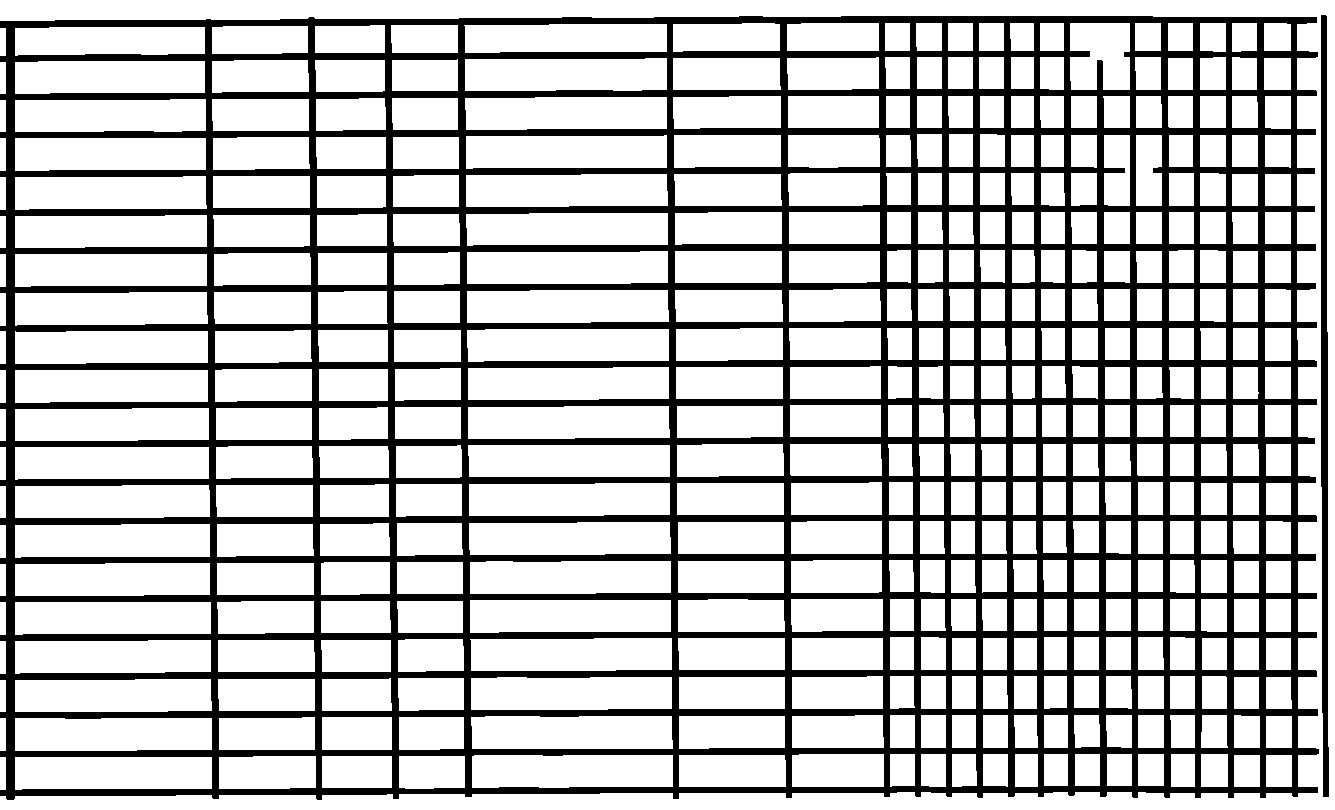

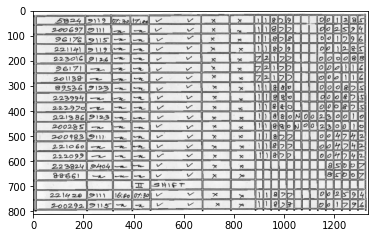

In [ ]:
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)

img_vh = cv2.erode(~img_vh, kernel, iterations =2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow( img_vh)
bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)
#Plotting the generated image
plotting = plt.imshow(bitnot,cmap='gray')
plt.show()

In [ ]:
import numpy as np
import argparse
import imutils

 
def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
 
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
 
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
 
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
 
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

In [ ]:
# from imutils import contours

contours, heirachy = cv2.findContours(combined_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)



contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")

heights = [boundingBoxes[i][3] for i in range (len(boundingBoxes))]

mean = np.mean(heights)

box = []

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if(w>0 and h>0):
        image = cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0),2)
        box.append([x, y, w, h])




In [ ]:
print(box)

[[0, 0, 1335, 810], [1321, 15, 8, 782], [1263, 22, 29, 30], [1231, 22, 27, 31], [1199, 22, 28, 31], [1167, 22, 27, 30], [1134, 22, 28, 30], [1069, 22, 62, 69], [1039, 22, 26, 30], [1009, 22, 26, 30], [978, 22, 27, 30], [947, 22, 27, 30], [915, 22, 28, 30], [884, 22, 27, 30], [786, 22, 94, 30], [672, 22, 109, 31], [463, 23, 205, 31], [390, 24, 69, 30], [314, 24, 72, 30], [211, 25, 98, 30], [14, 26, 192, 31], [0, 27, 7, 30], [1231, 56, 27, 35], [1199, 56, 28, 35], [1134, 56, 28, 35], [1039, 56, 26, 35], [1010, 56, 25, 34], [978, 56, 27, 34], [947, 56, 27, 34], [916, 56, 27, 34], [884, 56, 27, 34], [786, 56, 94, 35], [1263, 57, 29, 34], [1167, 57, 27, 34], [672, 57, 110, 34], [464, 57, 204, 35], [391, 58, 68, 34], [314, 59, 72, 34], [211, 59, 99, 35], [14, 60, 192, 35], [0, 61, 7, 34], [1264, 95, 28, 35], [1231, 95, 28, 34], [1199, 95, 28, 34], [1167, 95, 27, 34], [1135, 95, 28, 34], [1102, 95, 29, 34], [1070, 95, 28, 34], [1039, 95, 26, 34], [1010, 95, 25, 34], [979, 95, 26, 34], [947, 9

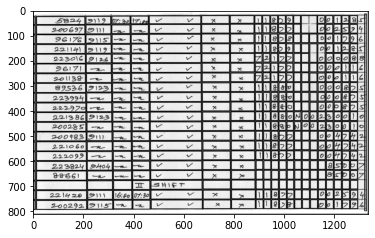

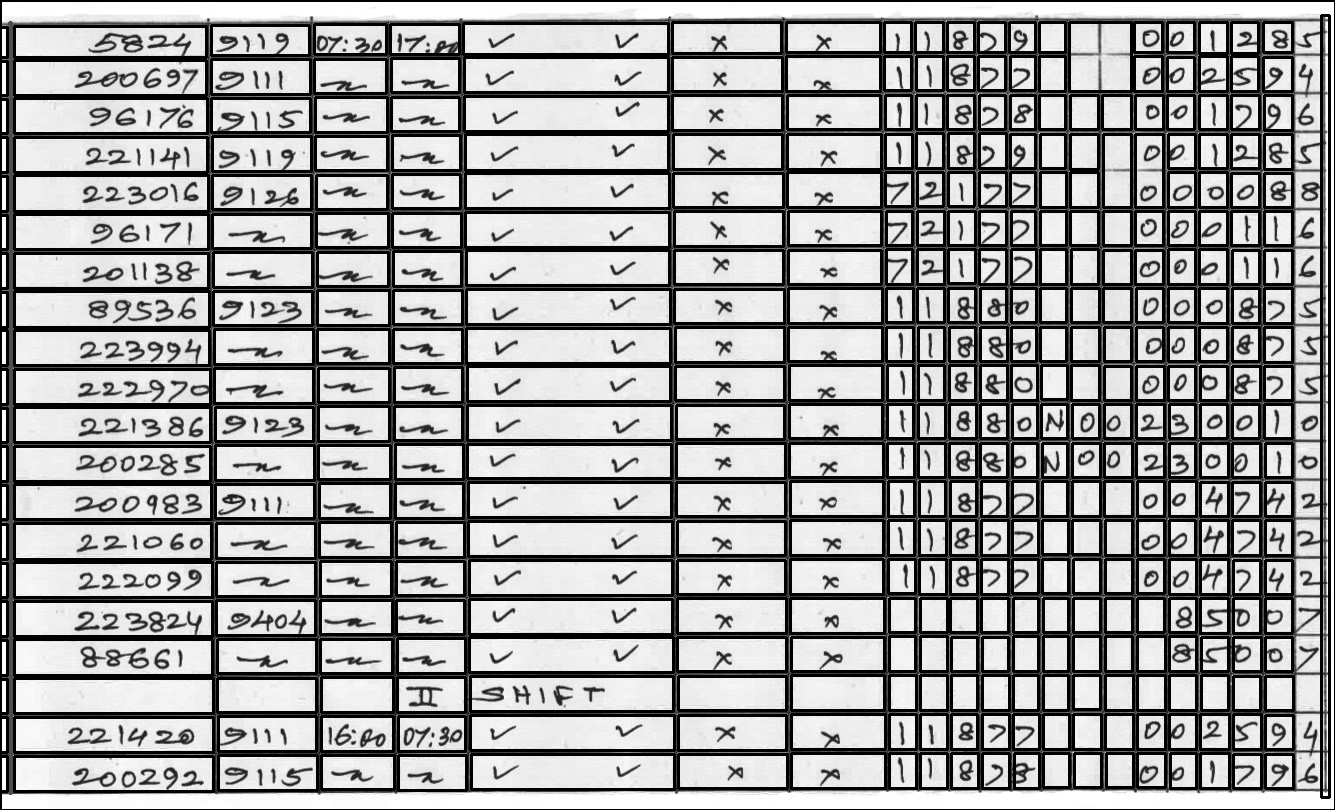

In [ ]:
plotting = plt.imshow(image, cmap='gray')
plt.show()

cv2_imshow(image)

In [ ]:
row = []
column = []
j = 0

for i in range(len(box)):
    if (i == 0):
        column.append(box[i])
        previous = box[i]
    else:
        if(box[i][1] <= previous[1]+ mean/2):
            column.append(box[i])
            previous=box[i]

            if (i == len(box)-1):
                row.append(column)

        else:
            row.append(column)
            column=[]
            previous = box[i]
            column.append(box[i])
print(column)
print(row)

[[1200, 753, 29, 35], [1170, 753, 26, 35], [1137, 753, 28, 34], [1106, 753, 27, 34], [1074, 753, 27, 34], [1043, 753, 26, 34], [1014, 753, 25, 35], [982, 753, 27, 35], [951, 753, 27, 35], [920, 753, 27, 35], [889, 753, 27, 35], [791, 753, 94, 35], [1265, 754, 28, 34], [1233, 754, 28, 34], [678, 754, 109, 34], [471, 754, 203, 35], [398, 755, 68, 35], [321, 755, 73, 34], [218, 755, 99, 35], [14, 756, 199, 35], [0, 756, 7, 35]]
[[[0, 0, 1335, 810], [1321, 15, 8, 782], [1263, 22, 29, 30], [1231, 22, 27, 31], [1199, 22, 28, 31], [1167, 22, 27, 30], [1134, 22, 28, 30], [1069, 22, 62, 69], [1039, 22, 26, 30], [1009, 22, 26, 30], [978, 22, 27, 30], [947, 22, 27, 30], [915, 22, 28, 30], [884, 22, 27, 30], [786, 22, 94, 30], [672, 22, 109, 31], [463, 23, 205, 31], [390, 24, 69, 30], [314, 24, 72, 30], [211, 25, 98, 30], [14, 26, 192, 31], [0, 27, 7, 30]], [[1231, 56, 27, 35], [1199, 56, 28, 35], [1134, 56, 28, 35], [1039, 56, 26, 35], [1010, 56, 25, 34], [978, 56, 27, 34], [947, 56, 27, 34], [91

In [ ]:
#max cells value calculation

countcol = 0
for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
        countcol = countcol

print(countcol)

21


In [ ]:
center = [int (row[i] [j] [0] + row[i] [j] [2] /2) for j in range (len(row[i])) if row[0]]
center = np.array(center)
center.sort()



In [ ]:
finalboxes = []

for i in range(len(row)):
    lis = []
    for k in range(countcol):
        lis.append([])
    for j in range(len(row[i])):
        diff = abs(center-(row[i] [j] [0] + row [i] [j] [2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        lis[indexing].append(row[i][j])
    finalboxes.append(lis)

In [ ]:
outer = []
for i in range (len(finalboxes)):
    for j in range (len(finalboxes[i])):
        inner = ''
        if(len(finalboxes[i][j])==0):
            outer.append(' ')

        else:
            for k in range(len(finalboxes[i] [j])):
                y, x, w, h = finalboxes[i] [j] [k] [0], finalboxes[i] [j] [k] [1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                final_img = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,1))

                border = cv2.copyMakeBorder(final_img, 2, 2, 2, 2, cv2.BORDER_CONSTANT, value = [255,255])
                resizing = cv2.resize(border, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel, iterations = 1)
                erosion = cv2.erode(dilation, kernel, iterations = 1)
                

                out = pytesseract.image_to_string(erosion)
                if (len(out)==0):
                    out = pytesseract.image_to_string(erosion,lang='eng',   config="-c tessedit_char_whitelist=0123456789 --psm 10 ")
                    inner = inner +" "+ out
            outer.append(inner)

In [ ]:
import pandas as pd

arr = np.array(outer)
dataframe = pd.DataFrame(arr.reshape(len(row), countcol))
print(dataframe)
data = dataframe.style.set_properties(align='left')
data.to_excel("./output2.xlsx")

    0            1           2          3   ...     17    18    19      20
0    ]     [| B24 |     [3119 |   lov: 3a)  ...   lo |   [1]   [2]    [sg]
1    ]                     D0 |       [esl  ...     lo   2 |   Is]    I> |
2    ]                    [sis]      [—~ |  ...     o|   [1]    5]       5
3    ]                               [ae |  ...     b|     |   [2]      le
4    ]                    [2126      [ee |  ...     lo    lo   [o|       a
5    ]      = Si 7k      [ees |      Law |  ...     a]   lo]          [1 |
6    ]   | 20et3ae|       rma |       Lage  ...     o|   le]     1    [1 |
7    ]    | 895236!      [2123]       (ama  ...    lol    lo   ia!     [>|
8    |    [ 223994]       serge      mes |  ...     o|   lo|    l¢      P|
9    ]                   | ee |      [—~ |  ...     lo     |    le      >|
10   ]                   [S123]         ae  ...    [S|    [|   lo|       |
11   ]    | 200285]      | ee |      [—e_|  ...     [|   lo]   a |     [1]
12   ]    [| 200993      